# データのロード
まずはデータを読み込んで見ましょう。csvデータの読み込みは複数のやり方がありえますが、pandasのread_csv関数はその中でも機能が豊富で、扱いやすいためこれを使います。
これを使うと、csvデータを読み込み、pandas.DataFrameにして返してくれます。

In [69]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.simplefilter('ignore')

In [136]:
#データの読み込みと前処理
import pandas as pd
train = pd.read_csv("train_data.csv", index_col='id')
test = pd.read_csv("test_data.csv", index_col='id')
game = pd.read_csv("game_info.csv")
target = train['y']
game = game.drop('Unnamed: 0',axis=1)
print(train.shape)
print(test.shape)
print(test.head())

(20400, 23)
(33808, 13)
    totalPitchingCount  B  S  O     b1     b2     b3  pitcher pitcherHand  \
id                                                                          
0                    2  1  0  0  False  False  False    遠藤 淳志           R   
1                    1  0  0  0  False  False  False  バンデンハーク           R   
2                    7  3  2  2   True  False  False     スアレス           R   
3                    1  0  0  2   True  False  False      クック           R   
4                    2  0  0  2  False  False  False    則本 昂大           R   

   batter batterHand    gameID inning  
id                                     
0    乙坂 智          L  20202564    2回表  
1   西川 遥輝          L  20202106    3回裏  
2   堂林 翔太          R  20203305    9回裏  
3   井領 雅貴          L  20202650    3回裏  
4   安達 了一          R  20202339    2回表  


In [153]:
train = pd.merge(train, game, on='gameID')
test = pd.merge(test, game, on='gameID')
#print(test.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20400 entries, 0 to 20399
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   totalPitchingCount  20400 non-null  int64 
 1   B                   20400 non-null  int64 
 2   S                   20400 non-null  int64 
 3   O                   20400 non-null  int64 
 4   b1                  20400 non-null  bool  
 5   b2                  20400 non-null  bool  
 6   b3                  20400 non-null  bool  
 7   pitcher             20400 non-null  object
 8   pitcherHand         20355 non-null  object
 9   batter              20400 non-null  object
 10  batterHand          20355 non-null  object
 11  gameID              20400 non-null  int64 
 12  inning              20400 non-null  object
 13  y                   20400 non-null  int64 
 14  bottomTeam_x        20400 non-null  object
 15  bgBottom_x          20400 non-null  int64 
 16  topTeam_x           20

In [132]:
test.head()
#train.head()
#test.info()
#train.info()

,totalPitchingCount,B,S,O,b1,b2,b3,pitcher,pitcherHand,batter,batterHand,gameID,inning,startTime,bottomTeam,bgBottom,topTeam,place,startDayTime,bgTop
0,2,1,0,0,False,False,False,遠藤 淳志,R,乙坂 智,L,20202564,2回表,13:30,広島,6,DeNA,マツダスタジアム,2020-09-06 13:30:00,3
1,4,1,2,1,False,False,False,京山 将弥,R,ピレラ,R,20202564,3回裏,13:30,広島,6,DeNA,マツダスタジアム,2020-09-06 13:30:00,3
2,2,0,1,2,True,False,False,京山 将弥,R,大盛 穂,L,20202564,4回裏,13:30,広島,6,DeNA,マツダスタジアム,2020-09-06 13:30:00,3
3,5,2,2,1,False,False,False,京山 将弥,R,鈴木 誠也,R,20202564,5回裏,13:30,広島,6,DeNA,マツダスタジアム,2020-09-06 13:30:00,3
4,1,0,0,0,False,False,False,遠藤 淳志,R,梶谷 隆幸,L,20202564,1回表,13:30,広島,6,DeNA,マツダスタジアム,2020-09-06 13:30:00,3


In [84]:
#重複データの表示
#print(train[train_data.duplicated()])

#重複データの削除
#2040-3264=
train = train.drop_duplicates()
print(train)

       totalPitchingCount  B  S  O     b1     b2     b3 pitcher pitcherHand  \
0                       1  0  0  0  False  False  False   今永 昇太           L   
1                       2  1  0  0  False  False  False   今永 昇太           L   
2                       3  1  1  0  False  False  False   今永 昇太           L   
3                       4  2  1  0  False  False  False   今永 昇太           L   
4                       5  2  2  0  False  False  False   今永 昇太           L   
...                   ... .. .. ..    ...    ...    ...     ...         ...   
20152                   2  1  0  2  False  False  False    森 唯斗           R   
20153                   3  1  1  2  False  False  False    森 唯斗           R   
20154                   4  2  1  2  False  False  False    森 唯斗           R   
20155                   5  2  2  2  False  False  False    森 唯斗           R   
20156                   6  3  2  2  False  False  False    森 唯斗           R   

      batter  ... battingType  isOuts  y startTime 

In [85]:
print(train.shape)

(17136, 30)


In [86]:
#カテゴリ変数の確認
cat_cols = [col for col in train.columns[:29] if train[col].dtype in ['O']]
train[cat_cols].describe() 
#cat_cols = [col for col in test.columns[:19] if test[col].dtype in ['O']]
#test[cat_cols].describe() 

,pitcher,pitcherHand,batter,batterHand,inning,pitchType,speed,ballPositionLabel,ballY,dir,battingType,isOuts,startTime,bottomTeam,topTeam,place,startDayTime
count,17136,17105,17136,17105,17136,17136,17136,17136,17136,3094,3094,4356,17136,17136,17136,17136,17136
unique,188,2,236,2,18,9,71,12,11,26,5,2,3,10,10,10,14
top,大瀬良 大地,R,西川 遥輝,R,4回裏,ストレート,144km/h,外角低め,K,I,G,True,18:00,西武,阪神,メットライフ,2020-06-20 14:00:00
freq,248,12078,224,9019,1045,7081,823,3754,2610,164,1425,2947,10521,3006,2816,3006,1848


In [89]:
#量的変数の偏りチェック
train.describe()


,totalPitchingCount,B,S,O,gameID,ballX,dist,y,bgBottom,bgTop
count,17136.000000,17136.000000,17136.000000,17136.000000,1.713600e+04,17136.000000,4356.000000,17136.00000,17136.000000,17136.000000
mean,2.931664,0.908322,0.880369,1.018557,2.020215e+07,11.554038,40.218756,1.26138,5.765815,7.321604
std,1.768198,0.967067,0.822600,0.820588,1.725055e+01,6.096338,36.485231,1.33110,3.623813,3.078760
min,1.000000,0.000000,0.000000,0.000000,2.020212e+07,1.000000,0.000000,0.00000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,2.020213e+07,7.000000,0.000000,0.00000,2.000000,5.000000
50%,3.000000,1.000000,1.000000,1.000000,2.020215e+07,12.000000,37.300000,1.00000,7.000000,8.000000
75%,4.000000,2.000000,2.000000,2.000000,2.020216e+07,16.000000,64.550000,2.00000,9.000000,10.000000
max,17.000000,3.000000,2.000000,2.000000,2.020218e+07,21.000000,136.600000,7.00000,12.000000,12.000000


(array([7429.,    0.,    0., 5290.,    0.,    0., 2976.,    0.,    0.,
        1441.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

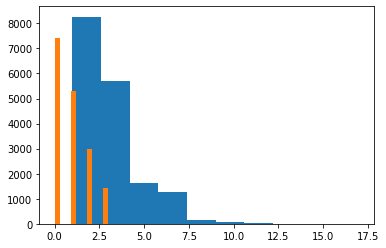

In [15]:
plt.hist(train["totalPitchingCount"])

(array([7429.,    0.,    0., 5290.,    0.,    0., 2976.,    0.,    0.,
        1441.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

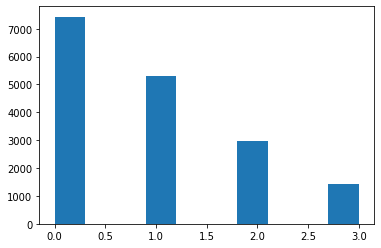

In [16]:
plt.hist(train["B"])

plt.hist(train["S"])

(array([5613.,    0.,    0.,    0.,    0., 5592.,    0.,    0.,    0.,
        5931.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

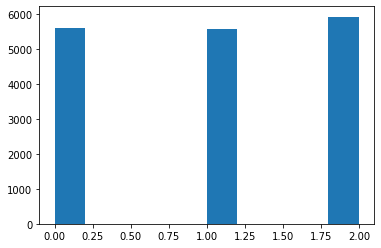

In [18]:
plt.hist(train["O"])

In [ ]:
plt.hist(train["S"])

(array([1689., 1215., 1018., 1680., 1603., 2190., 1850., 1820., 1232.,
        2839.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

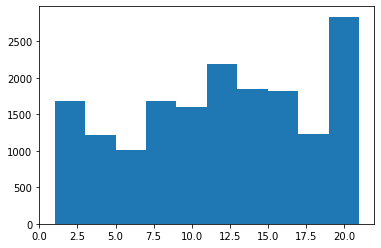

In [19]:
plt.hist(train["ballX"])

(array([1308., 1403., 1257., 2145., 2415., 2265.,  799., 1590., 2610.,
        1344.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

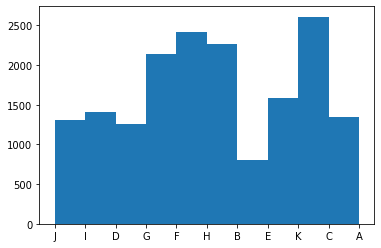

In [20]:
plt.hist(train["ballY"])

(array([4611., 2593., 1167.,    0.,    0., 3006.,  243., 1641., 2130.,
        1745.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

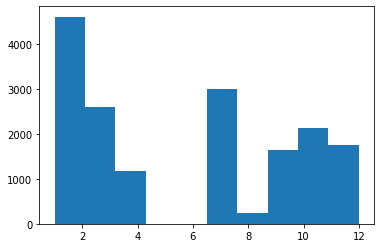

In [21]:
plt.hist(train["bgBottom"])

(array([1377.,  260.,  995.,  473.,  227.,  262.,  249.,  289.,  172.,
          52.]),
 array([  0.  ,  13.66,  27.32,  40.98,  54.64,  68.3 ,  81.96,  95.62,
        109.28, 122.94, 136.6 ]),
 <a list of 10 Patch objects>)

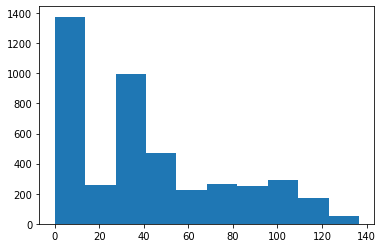

In [22]:
plt.hist(train["dist"])

(array([ 909.,  300., 1745., 2816., 2601.,    0., 2730., 1203.,  861.,
        3971.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

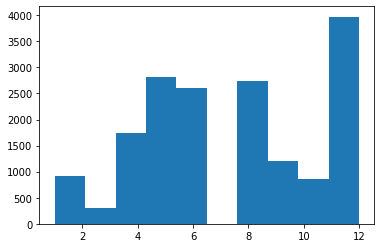

In [23]:
plt.hist(train["plt.figure(figsize="])

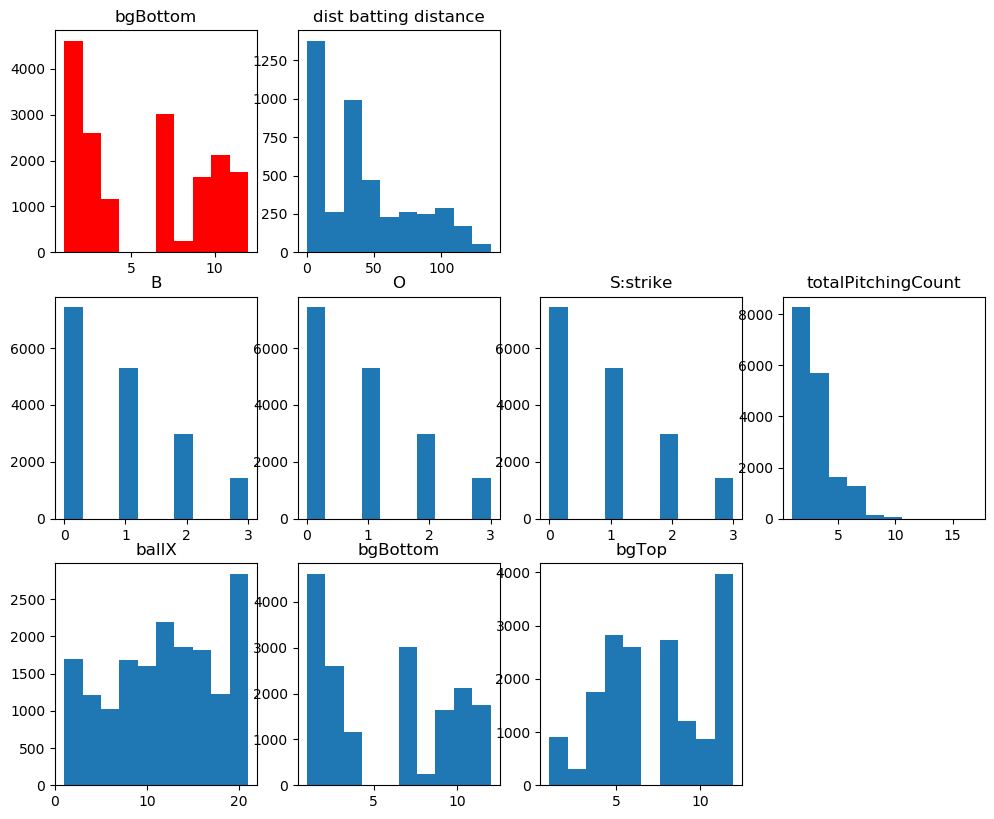

In [46]:
fig = plt.figure(figsize=(12,10), dpi = 100) #figsize:グラフを描くスペースを作成  横縦を(float, float)で指定。 dpi:整数で指定。台紙figreのfigsize*dpiが画像サイズになる。

ax1 = fig.add_subplot(3, 4, 1) #2行4列の行列で、左上から数えて1番目に描画する
ax1.hist(train.bgBottom,color="red")
ax1.set_title('bgBottom')

ax2 = fig.add_subplot(3, 4, 2) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.dist)
ax2.set_title('dist batting distance')
ax2 = fig.add_subplot(3, 4, 5) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.B)
ax2.set_title('B')
ax2 = fig.add_subplot(3, 4, 6) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.B)
ax2.set_title('O')
ax2 = fig.add_subplot(3, 4, 7) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.B)
ax2.set_title('S:strike')
ax2 = fig.add_subplot(3, 4, 8) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.totalPitchingCount)
ax2.set_title('totalPitchingCount')
ax2 = fig.add_subplot(3, 4, 9) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.ballX)
ax2.set_title('ballX')
ax2 = fig.add_subplot(3, 4, 10) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.bgBottom)
ax2.set_title('bgBottom')
ax2 = fig.add_subplot(3, 4, 11) #1行2列の行列で、左上から数えて2番目に描画する
ax2.hist(train.bgTop)
ax2.set_title('bgTop')

plt.show()

In [105]:
num_data=train.select_dtypes(include='int64') #int64型のデータを集計
num_data

,totalPitchingCount,B,S,O,gameID,ballX,y
id,,,,,,,
0,1,0,0,0,20202173,17,0
1,2,1,0,0,20202173,14,1
2,3,1,1,0,20202173,8,0
3,4,2,1,0,20202173,21,2
4,5,2,2,0,20202173,7,4
...,...,...,...,...,...,...,...
20395,2,1,0,2,20202118,7,2
20396,3,1,1,2,20202118,12,0
20397,4,2,1,2,20202118,10,1


In [106]:
obj_data=train.select_dtypes(include='object') #object型のデータを集計
obj_data


,pitcher,pitcherHand,batter,batterHand,inning,pitchType,speed,ballPositionLabel,ballY,dir,battingType,isOuts
id,,,,,,,,,,,,
0,今永 昇太,L,ピレラ,R,1回表,ストレート,149km/h,内角低め,J,NaN,NaN,NaN
1,今永 昇太,L,ピレラ,R,1回表,ストレート,149km/h,内角低め,I,NaN,NaN,NaN
2,今永 昇太,L,ピレラ,R,1回表,チェンジアップ,137km/h,外角高め,D,NaN,NaN,NaN
3,今永 昇太,L,ピレラ,R,1回表,スライダー,138km/h,内角中心,G,NaN,NaN,NaN
4,今永 昇太,L,ピレラ,R,1回表,チェンジアップ,136km/h,外角中心,F,S,G,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20395,森 唯斗,R,大田 泰示,R,9回裏,カットファストボール,143km/h,外角中心,F,NaN,NaN,NaN
20396,森 唯斗,R,大田 泰示,R,9回裏,カーブ,120km/h,真ん中低め,K,NaN,NaN,NaN
20397,森 唯斗,R,大田 泰示,R,9回裏,カーブ,120km/h,真ん中低め,H,NaN,NaN,NaN


##欠損値の有無による分類
---

欠損値がある量的変数、質的変数を見る

In [52]:
num_data.isnull().sum()

totalPitchingCount    0
B                     0
S                     0
O                     0
gameID                0
ballX                 0
y                     0
bgBottom              0
bgTop                 0
dtype: int64

In [53]:
obj_data.isnull().sum()

pitcher                  0
pitcherHand             31
batter                   0
batterHand              31
inning                   0
pitchType                0
speed                    0
ballPositionLabel        0
ballY                    0
dir                  14042
battingType          14042
isOuts               12780
startTime                0
bottomTeam               0
topTeam                  0
place                    0
startDayTime             0
dtype: int64

In [107]:
lostlist=obj_data.columns[obj_data.isnull().sum()!=0] #0でないものを論理式で表現
lostlist

Index(['pitcherHand', 'batterHand', 'dir', 'battingType', 'isOuts'], dtype='object')

In [108]:
complist=obj_data.columns[obj_data.isnull().sum()==0] #0であるものを論理式で表現
complist

Index(['pitcher', 'batter', 'inning', 'pitchType', 'speed',
       'ballPositionLabel', 'ballY'],
      dtype='object')

In [109]:
#欠損値だけのオブジェクト作る
lost_obj_data=train[lostlist]
lost_obj_data

,pitcherHand,batterHand,dir,battingType,isOuts
id,,,,,
0,L,R,NaN,NaN,NaN
1,L,R,NaN,NaN,NaN
2,L,R,NaN,NaN,NaN
3,L,R,NaN,NaN,NaN
4,L,R,S,G,False
...,...,...,...,...,...
20395,R,R,NaN,NaN,NaN
20396,R,R,NaN,NaN,NaN
20397,R,R,NaN,NaN,NaN


In [110]:
#質的変数も欠損値だけのオブジェクトを作成する
comp_obj_data=train[complist]
comp_obj_data

,pitcher,batter,inning,pitchType,speed,ballPositionLabel,ballY
id,,,,,,,
0,今永 昇太,ピレラ,1回表,ストレート,149km/h,内角低め,J
1,今永 昇太,ピレラ,1回表,ストレート,149km/h,内角低め,I
2,今永 昇太,ピレラ,1回表,チェンジアップ,137km/h,外角高め,D
3,今永 昇太,ピレラ,1回表,スライダー,138km/h,内角中心,G
4,今永 昇太,ピレラ,1回表,チェンジアップ,136km/h,外角中心,F
...,...,...,...,...,...,...,...
20395,森 唯斗,大田 泰示,9回裏,カットファストボール,143km/h,外角中心,F
20396,森 唯斗,大田 泰示,9回裏,カーブ,120km/h,真ん中低め,K
20397,森 唯斗,大田 泰示,9回裏,カーブ,120km/h,真ん中低め,H


## 分析方針の決定
---
ここから回帰編３を参考に

In [60]:
y_target = num_data['y']
y_target

0        0
1        1
2        0
3        2
4        4
        ..
20152    2
20153    0
20154    1
20155    0
20156    1
Name: y, Length: 17136, dtype: int64

In [61]:
col = num_data.columns.tolist() #変数のリストを取得
col.remove('y') #yを削除
print(col)

['totalPitchingCount', 'B', 'S', 'O', 'gameID', 'ballX', 'bgBottom', 'bgTop']


In [62]:
#yがない量的変数のオブジェクトデータを作成する
x_explanatory = num_data[col]
x_explanatory

,totalPitchingCount,B,S,O,gameID,ballX,bgBottom,bgTop
0,1,0,0,0,20202173,17,3,6
1,2,1,0,0,20202173,14,3,6
2,3,1,1,0,20202173,8,3,6
3,4,2,1,0,20202173,21,3,6
4,5,2,2,0,20202173,7,3,6
...,...,...,...,...,...,...,...,...
20152,2,1,0,2,20202118,7,8,12
20153,3,1,1,2,20202118,12,8,12
20154,4,2,1,2,20202118,10,8,12
20155,5,2,2,2,20202118,12,8,12


In [63]:
x_train,x_test,y_train, y_test = train_test_split(x_explanatory, y_target, random_state = 1)

## . 量的変数だけで、ランダムフォレストモデルの構築
---
ここからモデル構築

In [64]:
#ランダムフォレストの学習
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
#予測モデルの評価
rf_pred = rf_model.predict(x_test)
rf_pred

array([1.39133333, 1.145     , 1.66166667, ..., 1.83166667, 2.84133333,
       0.71666667])

In [70]:
mean_absolute_error(y_test, rf_pred)

0.9687564628415469

In [71]:
r2_score(y_test, rf_pred)

0.00871603223325601

In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
print(rmse)

1.3278840990319372


## 量的変数だけで、予測モデルと結果の可視化
---
ここから可視化

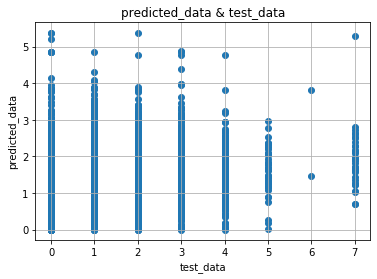

In [73]:
# y = xの関数になるか？

plt.scatter(y_test,rf_pred)

plt.title("predicted_data & test_data")
plt.xlabel("test_data")
plt.ylabel("predicted_data")

plt.grid(True)

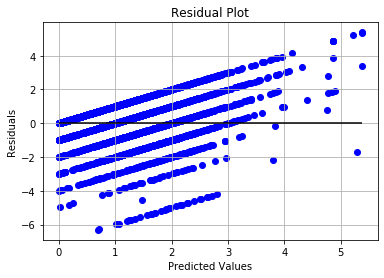

In [74]:
#残渣プロット
plt.scatter(rf_pred, rf_pred - y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = min(rf_pred), xmax = max(rf_pred), color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()                                               # 図の表示

In [75]:
with open('rf_model.pkl', mode='wb') as f:
    pickle.dump(rf_model, f)

##量的変数だけで、データクレンジング
---
回帰編４を参考


**データの説明**

- `totalPitchingCount`：各打席の投球が何球目か
- `B` `S` `O`:ボールカウント、ストライクカウント、アウトカウント
- `b1` `b2` `b3`:1塁にランナーがいるか、2塁にランナーがいるか、3塁にランナーがいるか


- `pitcher`：ピッチャー名（NaNを含む）
- `pitcherHand`：右投げか左投げか
- `pitchType`：球種
- `pitchType`：打球方向(A-Z)

- `batter`：バッター名（NaNを含む）
- `batterHand`：右打ちか左打ちか
- `battingType`：打球種類(B:バント, G:ゴロ, P:ポップフライ, F:フライ, L:ライナー)

- `isOuts`：isOuts

- `gameID`：試合ID
- `place`：試合会場
- `inning`：イニング　一回表
- `startDayTime`：試合開始日時
- `startTime`：	試合開始時間
- `topTeam`：先攻チーム名
- `bottomTeam`：後攻チーム名
- `bgBottom`：試合ID
						

In [111]:
test.columns

Index(['totalPitchingCount', 'B', 'S', 'O', 'b1', 'b2', 'b3', 'pitcher',
       'pitcherHand', 'batter', 'batterHand', 'gameID', 'inning'],
      dtype='object')

In [112]:
x_explanatory.columns

Index(['totalPitchingCount', 'B', 'S', 'O', 'gameID', 'ballX', 'bgBottom',
       'bgTop'],
      dtype='object')

In [117]:
test.columns


Index(['totalPitchingCount', 'B', 'S', 'O', 'b1', 'b2', 'b3', 'pitcher',
       'pitcherHand', 'batter', 'batterHand', 'gameID', 'inning', 'startTime',
       'bottomTeam', 'bgBottom', 'topTeam', 'place', 'startDayTime', 'bgTop'],
      dtype='object')

下記を削除
- 値が1つしかない量的変数
- サンプルごとに固有の値を持つ量的変数
- trainにあってtestにないカラム

In [154]:
# trainにあってtestにないカラム
drop_cols = ['pitchType','speed','ballPositionLabel','ballX','ballY','dir','dist','battingType','isOuts']
train = train.drop(drop_cols, axis='columns')

KeyError: "['pitchType' 'speed' 'ballPositionLabel' 'ballX' 'ballY' 'dir' 'dist'\n 'battingType' 'isOuts'] not found in axis"

In [141]:
#サンプルごとに固有の値を持つ質的変数 時系列データの削除
drop_cols = ['startDayTime','startTime']
#train = train.drop(drop_cols, axis='columns')
test = test.drop(drop_cols,axis='columns')

In [145]:
train.columns

Index(['totalPitchingCount', 'B', 'S', 'O', 'b1', 'b2', 'b3', 'pitcher',
       'pitcherHand', 'batter', 'batterHand', 'gameID', 'inning', 'y',
       'bottomTeam', 'bgBottom', 'topTeam', 'place', 'bgTop'],
      dtype='object')

In [143]:
test.columns

Index(['totalPitchingCount', 'B', 'S', 'O', 'b1', 'b2', 'b3', 'pitcher',
       'pitcherHand', 'batter', 'batterHand', 'gameID', 'inning', 'bottomTeam',
       'bgBottom', 'topTeam', 'place', 'bgTop'],
      dtype='object')

In [147]:
train["pitcher"].value_counts()

森下 暢仁    375
柳 裕也     354
梅津 晃大    316
濱口 遥大    309
與座 海人    305
        ... 
鍵谷 陽平     20
武藤 祐太     16
エドワーズ     14
ヒギンス      14
大西 広樹     12
Name: pitcher, Length: 188, dtype: int64

In [148]:
train["bgTop"].value_counts()

5     3410
8     3042
6     2916
12    2569
11    2519
4     1745
9     1522
1     1216
10     861
3      600
Name: bgTop, dtype: int64

In [149]:
train["batter"].value_counts()

西川 遥輝    265
梶谷 隆幸    254
近藤 健介    246
ソト       237
中田 翔     237
        ... 
井野 卓       3
佐野 皓大      3
上田 剛史      2
ガルシア       2
蝦名 達夫      1
Name: batter, Length: 236, dtype: int64

In [150]:
train["bottomTeam"].value_counts()

西武        3602
ヤクルト      2918
DeNA      2897
楽天        2761
巨人        2300
ロッテ       1919
中日        1772
ソフトバンク     884
オリックス      861
日本ハム       486
Name: bottomTeam, dtype: int64

In [151]:
train["topTeam"].value_counts()

阪神        3410
日本ハム      3042
広島        2916
ソフトバンク    2569
オリックス     2519
中日        1745
ロッテ       1522
巨人        1216
楽天         861
DeNA       600
Name: topTeam, dtype: int64